In [82]:
import pandas as pd
import datetime as dt

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import seaborn as sns
# from transformers import pipeline



In [29]:
# pip install transformers

In [30]:
from transformers import pipeline

In [31]:
df=pd.read_csv('/Users/balance/Desktop/Reddit_DS_ML_AI_posts.csv')

In [32]:
df.head(1)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7827,186,0.99


In [37]:
df1=pd.read_csv('/Users/balance/Desktop/DS_ML_AI_COMMENTS1.CSV')

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.


In [38]:
chunk_size = 100000
for chunk in pd.read_csv('/Users/balance/Desktop/DS_ML_AI_COMMENTS1.CSV', chunksize=chunk_size):
    # process each chunk of data
    print(chunk.head())

  post_id                                            comment
0  gh1dj9  Twitter thread: [https://twitter.com/cyrildiag...
1  gh1dj9                                       The future 🤯
2  gh1dj9  Simple yet very useful. Thank you for sharing ...
3  gh1dj9  Almost guaranteed, Apple will copy your idea i...
4  gh1dj9  Ohh the nightmare of making this into a stable...
                                                  post_id  \
100000    0/12 on code problems it never seen before r...   
100001                                            124eyso   
100002                                            124eyso   
100003                                            124eyso   
100004                                            124eyso   

                                                  comment  
100000                                                NaN  
100001  How does the AI perform any better than a Goog...  
100002                                      Whoops, done!  
100003  Clearly a sign of i

In [53]:
chunk.shape

(88331, 2)

In [39]:
cols_to_use = ['col1', 'col2', 'col3']
df2 = pd.read_csv('/Users/balance/Desktop/DS_ML_AI_COMMENTS1.CSV', usecols=cols_to_use)

ValueError: Usecols do not match columns, columns expected but not found: ['col1', 'col2', 'col3']

In [41]:
def csv_generator(filename):
    with open(filename, 'r') as f:
        # read header
        header = f.readline().strip().split(',')
        for line in f:
            row = line.strip().split(',')
            # process row
            yield row

gen = csv_generator('/Users/balance/Desktop/DS_ML_AI_COMMENTS1.CSV')
df3 = pd.DataFrame(gen, columns=header)

NameError: name 'header' is not defined

In [44]:
import dask.dataframe as dd

df4 = dd.read_csv('/Users/balance/Desktop/DS_ML_AI_COMMENTS1.CSV')


In [51]:
df4.info

<bound method DataFrame.info of Dask DataFrame Structure:
              post_id comment
npartitions=1                
               object  object
                  ...     ...
Dask Name: read-csv, 1 tasks>

In [59]:
df5 = pd.read_csv('/Users/balance/Desktop/DS_ML_AI_COMMENTS1.CSV', nrows=100000)

In [60]:
df5.shape

(100000, 2)

In [19]:
df_comment.shape

(2987, 10)

In [20]:
df.shape

(2987, 12)

In [22]:
df_comment.head(1)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7827,186,0.99


In [23]:
df.head(1)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7827,186,0.99,2020-05-10 06:19:54,2020


In [6]:
df['created_date']=df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
df['created_year']=df['created_date'].dt.year
df.head(1)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7827,186,0.99,2020-05-10 06:19:54,2020


In [7]:
df['post_title']

0       [Project] From books to presentations in 10s w...
1       [D] A Demo from 1993 of 32-year-old Yann LeCun...
2       [R] First Order Motion Model applied to animat...
3       [N] AI can turn old photos into moving Images ...
4       [D] This AI reveals how much time politicians ...
                              ...                        
2982    Elon Musk Plans to Beat Artificial Intelligenc...
2983    Utah soon could be first state to fully legali...
2984    Andrew Ng’s Next Trick: Training a Million AI ...
2985    Elon Musk may be gearing up for his strangest ...
2986    Neural Network Tries to Generate English Speec...
Name: post_title, Length: 2987, dtype: object

In [61]:
## merge posts data frame with comments data frame

comments_posts_df=df.merge(df5, on='post_id', how='left')


In [62]:
## remove rows with missing comments

comments_posts_df= comments_posts_df[~comments_posts_df['comment'].isnull()]

In [73]:
comments_posts_df.shape

(100000, 11)

In [63]:
comments_posts_df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,comment
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7827,186,0.99,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7827,186,0.99,The future 🤯
2,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7827,186,0.99,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7827,186,0.99,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7827,186,0.99,Ohh the nightmare of making this into a stable...


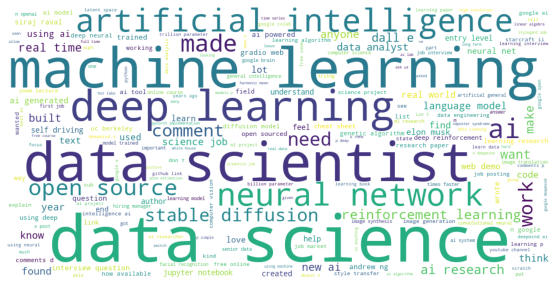

In [64]:
post_title_text= ' '.join([title for title in df['post_title'].str.lower()])

word_cloud=WordCloud(collocation_threshold=2, width=1000, height=500,
                    background_color='white').generate(post_title_text)

plt.figure(figsize=(10,5))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [84]:
sentiment_classifier = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment"
)

In [66]:
# conda install pytorch torchvision torchaudio -c pytorch

In [85]:
sentiment_classifier('i want to help you')

[{'label': 'LABEL_2', 'score': 0.6205688118934631}]

In [86]:
sentiment_classifier1 = pipeline(
    "sentiment-analysis",
    model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [87]:
sentiment_classifier1('ho are you ?')

[{'label': 'NEU', 'score': 0.9523906111717224}]

In [88]:
def get_gentiment(text):
    try:
        sentiment=sentiment_classifier(text)[0]['label']
    except:
        sentiment= 'Not classified'
    return sentiment

In [97]:
comments_posts_df_sub=comments_posts_df[comments_posts_df['post_title'].str.contains('gpt')]
comments_posts_df_sub.head(3)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,comment
30254,fvwwzj,MachineLearning,1.586172e+09,**The Orange Erotic Bible** \nI fine-tuned a ...,https://www.reddit.com/r/MachineLearning/comme...,"[Project] If gpt-2 read erotica, what would be...",Project,1070,150,0.95,[deleted]
30255,fvwwzj,MachineLearning,1.586172e+09,**The Orange Erotic Bible** \nI fine-tuned a ...,https://www.reddit.com/r/MachineLearning/comme...,"[Project] If gpt-2 read erotica, what would be...",Project,1070,150,0.95,So is this why OpenAI didn't want to release t...
30256,fvwwzj,MachineLearning,1.586172e+09,**The Orange Erotic Bible** \nI fine-tuned a ...,https://www.reddit.com/r/MachineLearning/comme...,"[Project] If gpt-2 read erotica, what would be...",Project,1070,150,0.95,"""And the year was one of sexual dimorphism."" ..."


In [94]:
from textblob import TextBlob

def get_sentiment(text):
    try:
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity > 0:
            sentiment = 'positive'
        elif polarity < 0:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'
    except:
        sentiment = 'Not classified'
    return sentiment


In [98]:
comments_posts_df['sentiment']=comments_posts_df['comment'].astype(str).apply(lambda x: get_sentiment(x))


In [99]:
comments_posts_df.head(1)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,comment,sentiment
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7827,186,0.99,Twitter thread: [https://twitter.com/cyrildiag...,negative


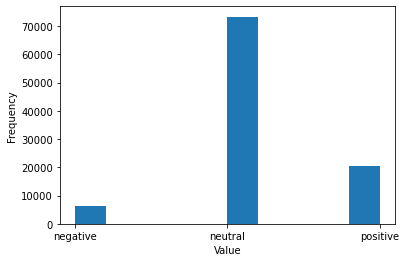

In [100]:
plt.hist(comments_posts_df['sentiment'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [101]:
comments_posts_df.sentiment.value_counts()

neutral     73325
positive    20434
negative     6241
Name: sentiment, dtype: int64